In [1]:
%matplotlib inline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import pdist
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn import metrics

/home/administrador/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
#Lectura de los datos
filename = 'wine.data'
filein = open(filename, 'r')
filelines = filein.readlines()
filein.close()

n_elements = len(filelines)
n_features = 13

data = np.zeros((n_elements, n_features))
clases=np.zeros(n_elements)
for i in range(n_elements):
    nums1 = filelines[i].split(',')
    nums=nums1[1:]
    clases[i]=nums1[0]
    for n in range(n_features):
        data[i,n] = nums[n]
    del nums

In [3]:
#Particion de los datos de entrenamiento y prueba
X_train,X_test,y_train,y_test=train_test_split(data,clases)

In [4]:
#Normalizacion de cada una de las caracteristicas 
std_scale = preprocessing.StandardScaler().fit(X_train)
std_scale1 = preprocessing.StandardScaler().fit(X_test)
X_train = std_scale.transform(X_train)
X_test = std_scale1.transform(X_test)

In [5]:
#Clasificacion de los datos en distinto numero de clusters
sumas=[]
d=sum(pdist(X_test)**2)
for k in range(1,11):
    cluster=KMeans(k)
    cluster.fit(X_train)
    distancias=cluster.transform(X_test)
    suma=0
    for r in range(X_test.shape[0]):            
        suma+=min(distancias[r,:])**2 
#    sumas.append((d-suma)/d*100)
    sumas.append(suma)

En la grafica podemos ver que la curva presenta el principal quiebre en 3 clusters por lo tanto podemos decir que este es numero optimo de clusters


/home/administrador/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


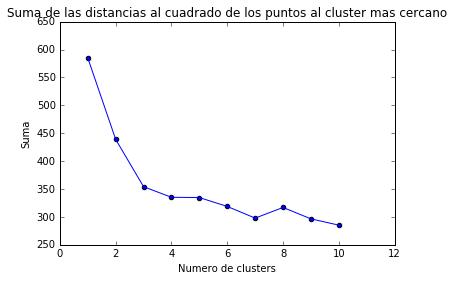

In [6]:
#Grafica de la suma de las distancias al cuadrado 
print 'En la grafica podemos ver que la curva presenta el principal quiebre en 3 clusters por lo tanto podemos decir que este es numero optimo de clusters'
ks=range(1,11)
m=plt.figure(1)
plt.plot(ks,sumas)
plt.scatter(ks,sumas)
plt.title('Suma de las distancias al cuadrado de los puntos al cluster mas cercano')
plt.xlabel('Numero de clusters')
plt.ylabel('Suma')
m.show()

In [7]:
#Clasificacion de los datos con tres clusters
cluster1=KMeans(3)
cluster1.fit(X_test);

In [8]:
#Calculo del error en la prediccion de los datos
pclusters=cluster1.predict(X_test)
error_c1=0
error_c2=0
error_c3=0
error_c4=0

In [9]:
#La numeracion de los clusters es arbitraria por esta razon se tiene que contemplar todas las combinaciones posibles
for i in range(X_test.shape[0]):
    if (pclusters[i]+1)!=y_test[i]:
        error_c1+=1
error_c1=float(error_c1)/X_test.shape[0]
for i in range(X_test.shape[0]):
    if pclusters[i]==0:
        pclusters[i]=1
    elif pclusters[i]==1:
        pclusters[i]=0
    if (pclusters[i]+1)!=y_test[i]:
        error_c2+=1
pclusters=cluster1.predict(X_test)
error_c2=float(error_c2)/X_test.shape[0]
for i in range(X_test.shape[0]):
    if pclusters[i]==0:
        pclusters[i]=2
    elif pclusters[i]==2:
        pclusters[i]=0
    if (pclusters[i]+1)!=y_test[i]:
        error_c3+=1
pclusters=cluster1.predict(X_test)
error_c3=float(error_c3)/X_test.shape[0]
for i in range(X_test.shape[0]):
    if pclusters[i]==1:
        pclusters[i]=2
    elif pclusters[i]==2:
        pclusters[i]=1
    if (pclusters[i]+1)!=y_test[i]:
        error_c4+=1
error_c4=float(error_c4)/X_test.shape[0]

En la grafica se pueden ver que despues de la componente  3  cada una de las componentes explican menos del 10% de la variacion por lo tanto se puede decir que este es el numero optimo de componentes


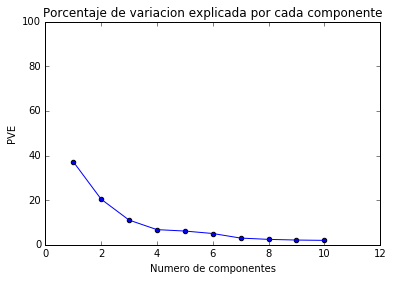

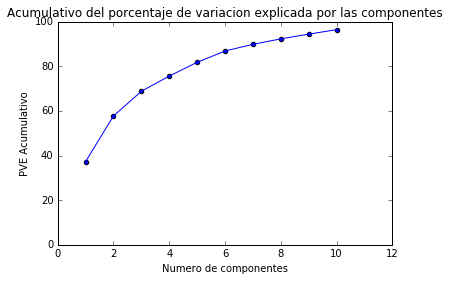

In [10]:
#Clasificacion por principal components analysis con 10 componentes
pca=PCA(10)
pca.fit_transform(X_train)
pve=pca.explained_variance_ratio_
n_comp=1
mayor=0
#for i in range(len(pve)-4):
#    pen1=pve[i+1]-pve[i+2]
#    pen2=pve[i+2]-pve[i+3]
#    dif=pen1-pen2
#    if dif>mayor:
#        mayor=dif
#        n_comp=(i+2)+1
for i in range(len(pve)):
    if pve[i]<0.09:
        n_comp=i
        break
print 'En la grafica se pueden ver que despues de la componente ',n_comp,' cada una de las componentes explican menos del 10% de la variacion por lo tanto se puede decir que este es el numero optimo de componentes'

p=plt.figure(2)
plt.plot(ks,pve*100)
plt.scatter(ks,pve*100)
plt.ylim(0,100)
plt.ylabel('PVE')
plt.xlabel('Numero de componentes')
plt.title('Porcentaje de variacion explicada por cada componente')
p.show()

pve_ac=[]
actual=0
for i in range(len(pve)):
    actual+=pve[i]*100
    pve_ac.append(actual)
g=plt.figure(3)
plt.plot(ks,pve_ac)
plt.scatter(ks,pve_ac)
plt.ylim(0,100)
plt.ylabel('PVE Acumulativo')
plt.xlabel('Numero de componentes')
plt.title('Acumulativo del porcentaje de variacion explicada por las componentes')
g.show()

In [11]:
#Clasificacion de los datos usando cuatro componentes
pca1=PCA(n_comp)
X_train_pca=pca1.fit_transform(X_train)
X_test_pca=pca1.transform(X_test)

In [12]:
#Calculo del error en la clasificacion usando 4 componentes
#Para calcular el error se debe usar nuevamente la clasificacion por clusters ya que PCA solo #hace una reduccion de las 
#dimensiones (o propiedades) en las cuales se observan los datos
clus_pca=KMeans(3)
clus_pca.fit(X_train_pca)
ppca=clus_pca.predict(X_test_pca)
error_pca1=0
error_pca2=0
error_pca3=0
error_pca4=0
for i in range(X_test.shape[0]):
    if (ppca[i]+1)!=y_test[i]:
        error_pca1+=1
error_pca1=float(error_pca1)/X_test.shape[0]

for i in range(X_test.shape[0]):
    if ppca[i]==0:
        ppca[i]=1
    elif ppca[i]==1:
        ppca[i]=0
    if (ppca[i]+1)!=y_test[i]:
        error_pca2+=1

ppca=clus_pca.predict(X_test_pca)
error_pca2=float(error_pca2)/X_test.shape[0]
for i in range(X_test.shape[0]):
    if ppca[i]==0:
        ppca[i]=2
    elif ppca[i]==2:
        ppca[i]=0
    if (ppca[i]+1)!=y_test[i]:
        error_pca3+=1

ppca=clus_pca.predict(X_test_pca)
error_pca3=float(error_pca3)/X_test.shape[0]
for i in range(X_test.shape[0]):
    if ppca[i]==1:
        ppca[i]=2
    elif ppca[i]==2:
        ppca[i]=1
    if (ppca[i]+1)!=y_test[i]:
        error_pca4+=1

error_pca4=float(error_pca4)/X_test.shape[0]

/home/administrador/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/administrador/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/forest.py:408: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


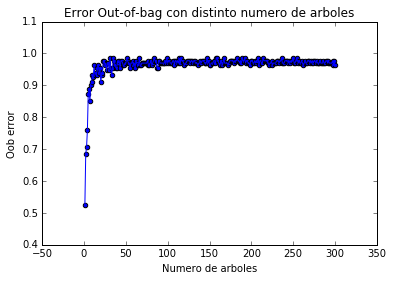

In [13]:
#Clasificacion de los datos por Random Forest usando distinto numero de arboles
puntajes=[]
xs=[]
error_bosques=[]
encontrado=False
mejor_n=0 
contador=0
miner=100000000
for i in range(300):
    bosque=rfc(n_estimators=i+1,oob_score=True)
    xs.append(i+1)
    bosque.fit(X_train,y_train)
#Calculo del error Out-of-bag     
    puntajes.append(bosque.oob_score_)
#Calculo del error en la clasificacion de los datos
    pbosque=bosque.predict(X_test)
    error_bosque=0
    for i in range(X_test.shape[0]):
        if pbosque[i]!=y_test[i]:
            error_bosque+=1
    if miner>error_bosque:
        miner=error_bosque
        mejor_n=i
    error_bosques.append(float(error_bosque)/X_test.shape[0])

w=plt.figure(4)
plt.plot(xs,puntajes)
plt.scatter(xs,puntajes)
plt.title('Error Out-of-bag con distinto numero de arboles')
plt.ylabel('Oob error')
plt.xlabel('Numero de arboles')
w.show()

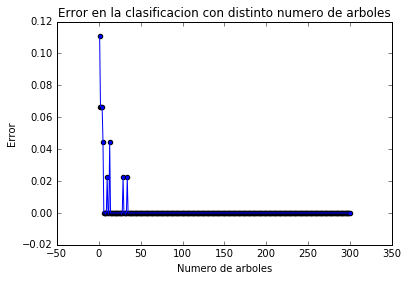

In [14]:
#A partir del error en la clasificacion determina cual es el numero optimo de los arboles
bosque1=rfc(n_estimators=mejor_n)
bosque1.fit(X_train,y_train)
pbosque=bosque1.predict(X_test)
error_bosque=0
for i in range(X_test.shape[0]):
    if pbosque[i]!=y_test[i]:
        error_bosque+=1
error_bosque=float(error_bosque)/X_test.shape[0]

p=plt.figure(5)
plt.plot(xs,error_bosques)
plt.scatter(xs,error_bosques)
plt.title('Error en la clasificacion con distinto numero de arboles')
plt.ylabel('Error')
plt.xlabel('Numero de arboles')
p.show()


In [15]:
error_cl=min([error_c1,error_c2,error_c3,error_c4])
error_pcas=min([error_pca1,error_pca2,error_pca3,error_pca4])
errores_met=[error_cl,error_pcas,error_bosque]
nombres=['3-Means clusters', 'Principal components analysis','Random Forest']
print 'El error en 3-Means clusters fue de', error_cl
print 'El error en PCA con 4 componentes fue de', error_pcas
print 'El error en random forest con', mejor_n ,'arboles fue de', error_bosque
print 'Por lo tanto el mejor metodo para clasificar los datos es', nombres[np.argmin(errores_met)]

El error en 3-Means clusters fue de 0.555555555556
El error en PCA con 4 componentes fue de 0.0222222222222
El error en random forest con 44 arboles fue de 0.0
Por lo tanto el mejor metodo para clasificar los datos es Random Forest


In [18]:
print 'Respuestas a las preguntas'
print '1. En todos los intentos que se hicieron el numero optimo de clusters es de 3 lo cual concuerda con el numero de clases de los vinos'
print '2. En la mayoria de los intentos que se hicieron el numero optimo de componentes son 3 ya que estas son las que explican la variacion en mas de un 10%'
print '3. Por lo general en todos los intentos hechos el numero optimo de arboles son 44 para clasificar los datos, para decidir esto me base en dos medidas la primera el error oob (en la grafica se puede ver que este error se empieza a estabilizar con 44 arboles), la segunda el error en las predicciones (se puede ver en la grafica que el error se empieza a estabilizar con 44 arboles)'
print '4. En los muchos intentos que se hicieron con la rutina anterior se obtuvo que por lo general el mejor metodo de clasificacion es el de Random Forest seguido de Principal Components Analysis y el ultimo 3-Means clusters puede que algunos resultados desmientan esta afirmacion pero esto se debe a que los datos se escogen arbitrariamente para entrenamiento y prueba.'

Respuestas a las preguntas
1. En todos los intentos que se hicieron el numero optimo de clusters es de 3 lo cual concuerda con el numero de clases de los vinos
2. En la mayoria de los intentos que se hicieron el numero optimo de componentes son 3 ya que estas son las que explican la variacion en mas de un 10%
3. Por lo general en todos los intentos hechos el numero optimo de arboles son 44 para clasificar los datos, para decidir esto me base en dos medidas la primera el error oob (en la grafica se puede ver que este error se empieza a estabilizar con 44 arboles), la segunda el error en las predicciones (se puede ver en la grafica que el error se empieza a estabilizar con 44 arboles)
4. En los muchos intentos que se hicieron con la rutina anterior se obtuvo que por lo general el mejor metodo de clasificacion es el de Random Forest seguido de Principal Components Analysis y el ultimo 3-Means clusters puede que algunos resultados desmientan esta afirmacion pero esto se debe a que los dato